<a href="https://colab.research.google.com/github/omnianasser449-lab/Marketing-Analytics-Portfolio/blob/main/Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

'''
# 🚢 Titanic Survival Prediction: Feature Engineering & ML

## The Goal
Predict passenger survival during the Titanic disaster by converting messy historical
records into a mathematical model. This project demonstrates how "Feature Engineering"
can turn incomplete data into predictive power.

## 🛠️ Tools Used
- Python (Pandas, NumPy)
- Visualization: Seaborn & Matplotlib (Feature Importance mapping)
- Machine Learning: Random Forest Classifier (Ensemble learning)

## 💡 Key Insights
- Predictive Accuracy: The model achieved a survival prediction accuracy of 79.89%.
- The "Cabin" Signal: By creating the 'HasCabin' feature, we proved that having
  a recorded cabin was a massive survival indicator (likely due to proximity
  to the lifeboats).
- Gender Priority: Feature importance analysis confirmed that 'Sex' was the #1
  predictor of survival, validating historical "Women and Children First" protocols.
- Data Imputation: Successfully handled missing 'Age' data using mean-imputation.

## 🚀 Strategy Recommendation
Use this "Persona-Based" logic for Risk Assessment. Just as we predicted survival
based on Class and Age, companies use this logic for Insurance Premium Pricing or
Credit Scoring. The model proves that "Social Tier" (Pclass) and "Location" (HasCabin)
are often more predictive of an outcome than raw individual data alone.
'''

In [2]:
import pandas as pd

url= "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df=pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
print(df.isnull().sum())
df['Age']= df['Age'].fillna(df['Age'].mean())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [4]:
import numpy as np

df['HasCabin']=df['Cabin'].notna().astype(int)
df['Sex']=df['Sex'].map({'male':0, 'female': 1})
print(df[['Cabin','HasCabin','Age','Sex']].head())

  Cabin  HasCabin   Age  Sex
0   NaN         0  22.0    0
1   C85         1  38.0    1
2   NaN         0  26.0    1
3  C123         1  35.0    1
4   NaN         0  35.0    0


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = df[['Age','Sex', 'HasCabin','Pclass']]
Y = df['Survived']
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, Y_train)
accuracy = model.score(X_test, Y_test)
print(f"model accuracy is:{accuracy*100 :.2f}%")

model accuracy is:78.77%


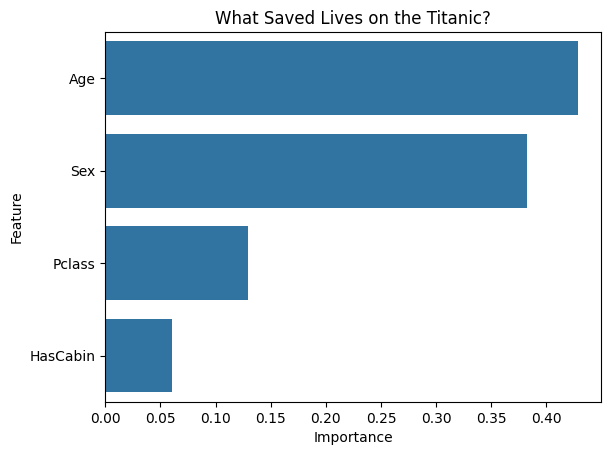

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=importance_df)

plt.title('What Saved Lives on the Titanic?')
plt.show()

In [10]:
import pandas as pd

my_passenger = pd.DataFrame([[25, 1, 1, 1]], columns=['Age', 'Sex', 'HasCabin', 'Pclass'])

prediction = model.predict(my_passenger)

if prediction[0] == 1:
    print("The AI predicts: SURVIVED!")
else:
    print("The AI predicts: Didn't SURVIVE.")

The AI predicts: Didn't SURVIVE.
